# Random Forest Regression - 2

Most of the time, to predict the continuous value in the datasets, the decision tree and Random forest regression predict the estimated value in subtle manner.

## Goal

To predict the petrol consumption from the features like average income, paved highways, etc.


## Python imports

In [2]:
# Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Read the Datasets

In [3]:
# reading the datasets
datasets = pd.read_csv('petrol_consumption.csv')
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
datasets.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410




## Data analysis

In [5]:
X = datasets.iloc[:,0:4].values
Y = datasets.iloc[:,4:].values

## Split the Dataset

In [6]:
# Now, we will split the data using train_test_scplit
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
X_train,y_train

(array([[  7.50000000e+00,   5.12600000e+03,   1.41860000e+04,
           5.25000000e-01],
        [  7.00000000e+00,   3.33300000e+03,   6.59400000e+03,
           5.13000000e-01],
        [  7.50000000e+00,   3.35700000e+03,   4.12100000e+03,
           5.47000000e-01],
        [  7.50000000e+00,   3.84600000e+03,   9.06100000e+03,
           5.79000000e-01],
        [  7.00000000e+00,   5.00200000e+03,   9.79400000e+03,
           5.93000000e-01],
        [  9.00000000e+00,   3.86500000e+03,   1.58600000e+03,
           5.80000000e-01],
        [  7.00000000e+00,   4.29600000e+03,   4.08300000e+03,
           6.23000000e-01],
        [  7.00000000e+00,   4.71600000e+03,   5.91500000e+03,
           7.24000000e-01],
        [  7.00000000e+00,   4.31800000e+03,   1.03400000e+04,
           5.86000000e-01],
        [  8.00000000e+00,   4.18800000e+03,   5.97500000e+03,
           5.63000000e-01],
        [  9.00000000e+00,   4.89700000e+03,   2.44900000e+03,
           5.11000000e-01],

From the above output, we can see that the datasets is not in the same scale, so we should use StandardScalar to scale them


## Scale the Data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)


## Fit the Model

In [16]:
# Now ,train the algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state=0)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [17]:
# predict the output
y_pred = regressor.predict(X_test)

In [18]:
y_pred[:5]


array([ 574.1 ,  514.6 ,  604.8 ,  589.75,  625.55])

In [20]:
y_test[:5]

array([[534],
       [410],
       [577],
       [571],
       [577]])


## Evaluate the prediction

In [22]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test, y_pred)

In [25]:
print('Mean Square error:-- ', MSE)
print('Mean Absolute error:-- ', MAE)
print('Root Mean Square error:-- ', RMSE)

Mean Square error:--  4216.16675
Mean Absolute error:--  51.765
Root Mean Square error:--  64.932016371


In [27]:
# we will take various value of trees fro predictions
trees_values = [20,30,50,100,200,300,500,600,700,800,900]
estimated_values = []
for values in trees_values:
    print('values:-- ', values)
    new_regressor = RandomForestRegressor(n_estimators=values, random_state = 0)
    new_regressor.fit(X_train, y_train)
    y_pred = new_regressor.predict(X_test)
    estimated_values.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

values:--  20
values:--  30
values:--  50
values:--  100


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  200


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  300
values:--  500


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  600


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  700


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  800


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


values:--  900


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [28]:
estimated_values


[64.932016370970643,
 62.61592183036727,
 61.12661122620819,
 59.977180910743037,
 58.904165705831034,
 58.689840101256976,
 58.574657892300138,
 58.893905985443205,
 59.336052574316398,
 59.413626306912967,
 59.317417454376653]

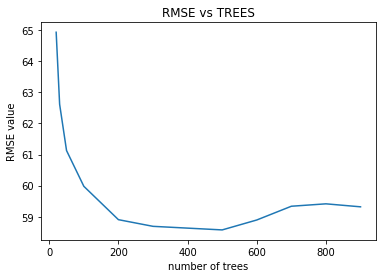

In [29]:
# visualize the estimated values with tree values
plt.title('RMSE vs TREES')
plt.xlabel('number of trees')
plt.ylabel('RMSE value')
plt.plot(trees_values, estimated_values)

We can say that after 400 number of trees, RMSE is constant

FINISH